c:\Users\86151\.conda\envs\SVD\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\86151\.conda\envs\SVD\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\86151\.conda\envs\SVD\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35780 (\N{CJK UNIFIED IDEOGRAPH-8BC4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\86151\.conda\envs\SVD\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35770 (\N{CJK UNIFIED IDEOGRAPH-8BBA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\86151\.conda\envs\SVD\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) m

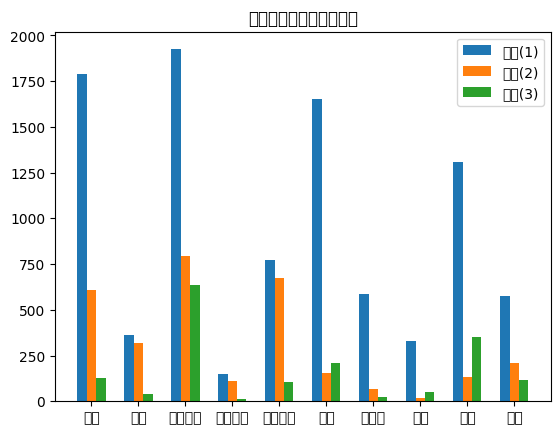

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


multi_df = pd.read_csv('data//multi.csv', encoding='utf-8')

aspects = ['区位','餐饮','房间设施','娱乐设施','店内设施','服务','风格化','安全','卫生','价格']

# 3. 分别统计各主题的积极(1)、中性(2)、消极(3)，可选是否统计未涉及(0)
counts_positive = []
counts_neutral = []
counts_negative = []
counts_not_mentioned = []

for asp in aspects:
    cnt_pos = (multi_df[asp] == 1).sum()
    cnt_neu = (multi_df[asp] == 2).sum()
    cnt_neg = (multi_df[asp] == 3).sum()
    cnt_none = (multi_df[asp] == 0).sum()

    counts_positive.append(cnt_pos)
    counts_neutral.append(cnt_neu)
    counts_negative.append(cnt_neg)
    counts_not_mentioned.append(cnt_none)

# 4. 画图 (示例：分组柱状图，对比积极/中性/消极；未涉及可根据需求看是否一起显示)
x = np.arange(len(aspects))  # X轴刻度数量 = 主题数量
bar_width = 0.2             # 每个柱子的宽度

plt.figure()  # 新建一个图

# 绘制积极数
plt.bar(x, counts_positive, width=bar_width, label='积极(1)')
# 绘制中性数
plt.bar(x + bar_width, counts_neutral, width=bar_width, label='中性(2)')
# 绘制消极数
plt.bar(x + 2*bar_width, counts_negative, width=bar_width, label='消极(3)')

# 未涉及(0
# plt.bar(x + 3*bar_width, counts_not_mentioned, width=bar_width, label='未涉及(0)')

# 设置X轴刻度名称
plt.xticks(x + bar_width, aspects)

# 加上图例和标题
plt.legend()
plt.title("各个评论主题的情感分布")

plt.show()


合并两个文件试一下，然后发现没什么必要。

In [ ]:
import pandas as pd

# 读取数据 
# 用multi.csv，因为这个文件包含了review.csv的内容，而另外两个关于图片的无法展示满意度
multi_df = pd.read_csv('data//multi.csv', encoding='utf-8')

# 主题列
aspects = ['区位','餐饮','房间设施','娱乐设施','店内设施','服务','风格化','安全','卫生','价格']

results = []
for asp in aspects:
    count_0 = (multi_df[asp] == 0).sum()
    count_1 = (multi_df[asp] == 1).sum()
    count_2 = (multi_df[asp] == 2).sum()
    count_3 = (multi_df[asp] == 3).sum()

    # 将统计结果组成字典
    row_dict = {
        '主题': asp,
        '未涉及(0)': count_0,
        '积极(1)': count_1,
        '中性(2)': count_2,
        '消极(3)': count_3
    }
    results.append(row_dict)

# 4. 转为DataFrame并保存为CSV
stats_df = pd.DataFrame(results)
stats_df.to_csv('aspect_sentiment_stats.csv', index=False, encoding='utf-8-sig')

print("统计结果已保存到 aspect_sentiment_stats.csv 中！")
print(stats_df)


统计结果已保存到 aspect_sentiment_stats.csv 中！
     主题  未涉及(0)  积极(1)  中性(2)  消极(3)
0    区位     995   1788    610    125
1    餐饮    2795    365    317     41
2  房间设施     165   1924    795    634
3  娱乐设施    3248    149    110     11
4  店内设施    1970    770    674    104
5    服务    1498   1653    156    211
6   风格化    2845    587     65     21
7    安全    3117    328     20     53
8    卫生    1727   1307    134    350
9    价格    2612    576    211    119
